In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tickers = ['AAPL', 'AMD', 'AMZN', 'CCJ', 'COST', 'GOOG', 'GS', 'JPM', 'LLY', 'META', 'MSFT', 'NEE', 'PFE', 'SAP', 'WMT']

In [3]:
ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

[*********************100%***********************]  15 of 15 completed


,AAPL,AMD,AMZN,CCJ,COST,GOOG,GS,JPM,LLY,META,MSFT,NEE,PFE,SAP,WMT
Date,,,,,,,,,,,,,,,
2023-06-16,184.919998,120.080002,125.489998,31.760000,523.650024,124.059998,338.309998,143.259995,447.709991,281.000000,342.329987,75.589996,40.060001,137.279999,155.529999
2023-06-20,185.009995,118.930000,125.779999,31.950001,519.700012,123.849998,330.720001,142.529999,451.950012,284.329987,338.049988,74.760002,39.340000,136.009995,154.160004
2023-06-21,183.960007,112.110001,124.830002,31.350000,519.619995,121.260002,325.070007,142.320007,453.000000,281.640015,333.559998,75.779999,38.900002,134.789993,154.460007
2023-06-22,187.000000,110.699997,130.149994,30.870001,524.200012,123.870003,319.579987,139.580002,457.679993,284.880005,339.709991,75.129997,38.730000,135.110001,155.750000
2023-06-23,186.679993,110.010002,129.330002,29.900000,524.440002,123.019997,314.709991,138.850006,458.839996,288.730011,335.019989,74.169998,38.299999,133.470001,155.460007


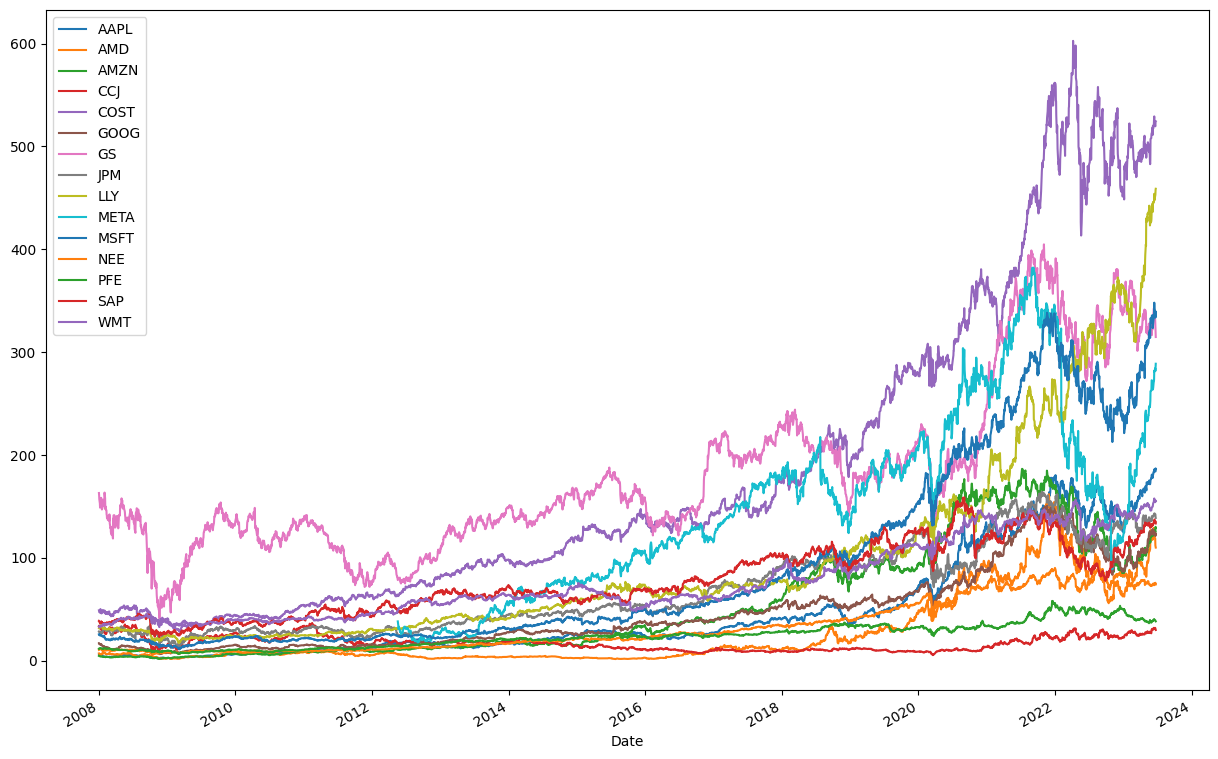

In [4]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [5]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAPL,AMD,AMZN,CCJ,COST,GOOG,GS,JPM,LLY,META,MSFT,NEE,PFE,SAP,WMT
AAPL,0.199844,0.090290,0.078759,0.035640,0.038965,0.053119,0.057073,0.046242,0.025735,0.051003,0.063192,0.015745,0.026958,0.056265,0.031961
AMD,0.090290,0.354006,0.105149,0.060114,0.043264,0.059532,0.083057,0.062365,0.032417,0.067598,0.073607,0.020487,0.033777,0.082529,0.032506
AMZN,0.078759,0.105149,0.326451,0.045260,0.048056,0.060986,0.063641,0.065289,0.029453,0.065440,0.073184,0.018561,0.030821,0.070862,0.035056
CCJ,0.035640,0.060114,0.045260,0.174502,0.020917,0.040746,0.050953,0.044035,0.019508,0.033596,0.034626,0.021909,0.021922,0.038607,0.014141
COST,0.038965,0.043264,0.048056,0.020917,0.100571,0.027903,0.037801,0.038146,0.026287,0.024091,0.037401,0.016099,0.025114,0.034906,0.038843
GOOG,0.053119,0.059532,0.060986,0.040746,0.027903,0.095056,0.049313,0.047800,0.023927,0.060145,0.047874,0.023160,0.023196,0.037453,0.018768
GS,0.057073,0.083057,0.063641,0.050953,0.037801,0.049313,0.135694,0.101530,0.029689,0.037108,0.053453,0.024793,0.031463,0.062235,0.029337
JPM,0.046242,0.062365,0.065289,0.044035,0.038146,0.047800,0.101530,0.127100,0.029633,0.031898,0.048760,0.020842,0.032450,0.058697,0.031379
LLY,0.025735,0.032417,0.029453,0.019508,0.026287,0.023927,0.029689,0.029633,0.072968,0.021244,0.030724,0.016410,0.036142,0.026159,0.022721
META,0.051003,0.067598,0.065440,0.033596,0.024091,0.060145,0.037108,0.031898,0.021244,0.164668,0.050656,0.020294,0.018800,0.037577,0.013481


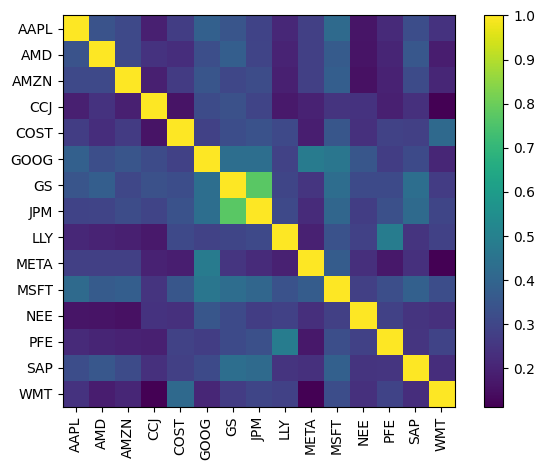

In [6]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

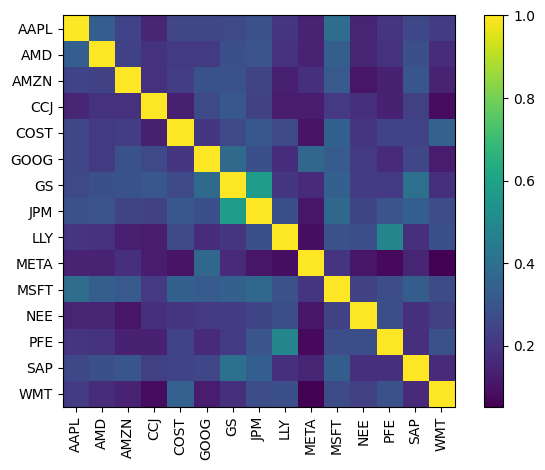

In [7]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

In [8]:
from pypfopt import EfficientFrontier

In [9]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(0.05, 0.1))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.05),
             ('AMD', 0.05),
             ('AMZN', 0.05),
             ('CCJ', 0.07794),
             ('COST', 0.0624),
             ('GOOG', 0.1),
             ('GS', 0.05),
             ('JPM', 0.05),
             ('LLY', 0.07785),
             ('META', 0.1),
             ('MSFT', 0.05),
             ('NEE', 0.1),
             ('PFE', 0.06314),
             ('SAP', 0.05),
             ('WMT', 0.06867)])

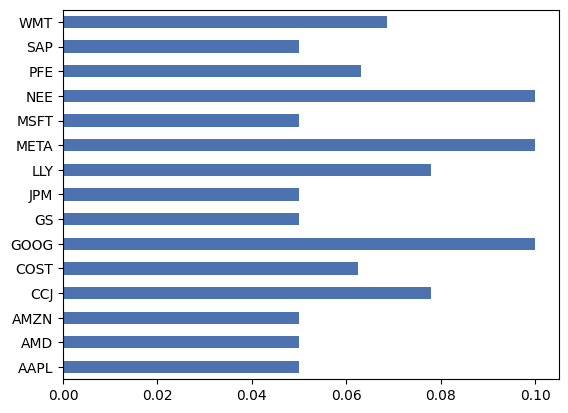

In [10]:
pd.Series(weights).plot.barh();

In [11]:
ef.portfolio_performance(verbose=True);

Annual volatility: 15.0%


In [12]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=800000, short_ratio=0.0)
alloc, leftover = da.greedy_portfolio() #instead of lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $24.71 leftover


{'GOOG': 650,
 'META': 277,
 'NEE': 1078,
 'CCJ': 2085,
 'LLY': 136,
 'WMT': 353,
 'PFE': 1318,
 'COST': 95,
 'AAPL': 214,
 'AMD': 364,
 'AMZN': 309,
 'GS': 127,
 'JPM': 288,
 'MSFT': 120,
 'SAP': 300}